In [ ]:
# Initial analysis to visualize the data
# Then explore the methods for using fia_stats, fia_sample_generation, and supp_modules

In [79]:
from glob import glob
import seaborn as sns
import pprint
import geopandas as gpd
import pandas as pd
import folium
import numpy as np
import os
import shutil
import wget
import folium.plugins
import dask.dataframe as dd
blob = '/home/datablob'
datafiles = glob(f'{blob}/*.csv')
pp = pprint.PrettyPrinter(indent=4,compact=True)
pp.pprint(datafiles)

['/home/datablob/fia_no_pltcn.csv']


In [100]:
#subset by STATECD
df = gpd.read_file(datafiles[0])
#df = df.astype({'INDEX':'int64', 'STATECD':'int32','LAT':'float', 'LON':'float', 'INVYR':'float'})
statecd = pd.read_csv(glob(f'{suppdir}/*.csv')[0])
query = 'CA'
code = statecd[statecd['STATEAB']== query]['STATECD'].values[0]
subdf = df[df['STATECD']==str(code)]

In [104]:
fields = ['INDEX', 'STATECD','INVYR', 'LAT', 'LON']
#subdf = subdf.rename(columns={'field_1':'INDEX'})[fields]
subdf = subdf.astype({'LAT':'float', 'LON':'float'})#, 'INVYR':'int32'})
subdf = gpd.GeoDataFrame(subdf, geometry=gpd.points_from_xy(subdf.LON, subdf.LAT))
subdf = subdf.set_crs(epsg=4326)

In [105]:
subdf

,INDEX,INVYR,STATECD,LAT,LON,geometry
772608,19953,2010.0,6,36.559327,-120.136011,POINT (-120.13601 36.55933)
772609,19954,2010.0,6,36.589481,-119.854677,POINT (-119.85468 36.58948)
772610,19955,2010.0,6,36.523922,-118.803712,POINT (-118.80371 36.52392)
772611,19956,2010.0,6,36.554354,-118.479162,POINT (-118.47916 36.55435)
772612,19957,2010.0,6,36.502029,-118.359839,POINT (-118.35984 36.50203)
...,...,...,...,...,...,...
810299,57644,2011.0,6,33.734035,-117.340522,POINT (-117.34052 33.73403)
810300,57645,2011.0,6,34.735323,-116.782671,POINT (-116.78267 34.73532)
810301,57646,2011.0,6,34.249692,-116.769648,POINT (-116.76965 34.24969)
810302,57647,2011.0,6,34.689458,-116.926009,POINT (-116.92601 34.68946)


In [106]:
xc = np.mean(subdf.LON)
yc = np.mean(subdf.LAT)

mapa = folium.Map(location=[yc, xc],zoom_start=4, tiles='CartoDB dark_matter')

marker_cluster = folium.plugins.MarkerCluster().add_to(mapa)
samplesize=999
for point in range(0, len(subdf[:samplesize])):
    folium.Marker(subdf.iloc[point][['LAT','LON']], popup=subdf['INDEX'].iloc[point]).add_to(marker_cluster)
mapa

<AxesSubplot:xlabel='INVYR'>

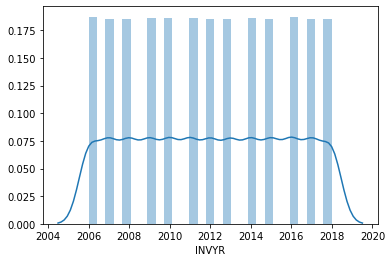

In [107]:
#looks good
#now let's sort by year and get all the data we can from the time period from 2004 to now
year_query = [2005, 2020]
subdf = subdf[(pd.to_numeric(subdf['INVYR'])>year_query[0]) & (pd.to_numeric(subdf['INVYR'])<=year_query[1])]
sns.distplot(subdf.INVYR)

In [ ]:
#wget the PLOT.zip file
#PLOTS_URL = 'https://apps.fs.usda.gov/fia/datamart/CSV/PLOT.zip'
#filename = wget.download(PLOTS_URL, out=suppdir)

In [ ]:
#okay, now we can remove the duplicates or at least determine which plots have been resampled
plotfile=f'{suppdir}/PLOT.zip'
plot = pd.read_csv(plotfile, compression='zip')

In [ ]:
plot[(plot.INVYR>=2003) & (plot.INVYR<=2008)]

In [ ]:
s = np.unique(plot[(plot.INVYR>=2003) & (plot.INVYR<=2008)].STATECD)

In [ ]:
for cd in s:
    if len(statecd[statecd.STATECD==cd])!=0:
        print(statecd[statecd.STATECD==cd].STATENM)

In [ ]:
len(s)